In [40]:
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import glob, csv
import nltk
import re
import string
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
authors = os.listdir('./data/C50train')
print(authors)
print(len(authors))

['AaronPressman', 'AlanCrosby', 'AlexanderSmith', 'BenjaminKangLim', 'BernardHickey', 'BradDorfman', 'DarrenSchuettler', 'DavidLawder', 'EdnaFernandes', 'EricAuchard', 'FumikoFujisaki', 'GrahamEarnshaw', 'HeatherScoffield', 'JaneMacartney', 'JanLopatka', 'JimGilchrist', 'JoeOrtiz', 'JohnMastrini', 'JonathanBirt', 'JoWinterbottom', 'KarlPenhaul', 'KeithWeir', 'KevinDrawbaugh', 'KevinMorrison', 'KirstinRidley', 'KouroshKarimkhany', 'LydiaZajc', "LynneO'Donnell", 'LynnleyBrowning', 'MarcelMichelson', 'MarkBendeich', 'MartinWolk', 'MatthewBunce', 'MichaelConnor', 'MureDickie', 'NickLouth', 'PatriciaCommins', 'PeterHumphrey', 'PierreTran', 'RobinSidel', 'RogerFillion', 'SamuelPerry', 'SarahDavison', 'ScottHillis', 'SimonCowell', 'TanEeLyn', 'TheresePoletti', 'TimFarrand', 'ToddNissen', 'WilliamKazer']
50


In [42]:
def dataframe_creation(path):
    labels = []
    docs = []
    path='./data/C50train/'
    for r, dirs, files in os.walk(path):
         for file in files:
               # print(file)
                with open(os.path.join(r, file), "r") as f:
                    author_text = f.read()
                    author_sentences = author_text.replace('.\n','')
                    docs.append(author_sentences)
                    labels.append(r.replace(path,''))

                    #author_sentences = author_text.split(".\n")
                    #for sentence in author_sentences:
                    #        sentence = sentence.replace('\n', '')
                    #        if sentence.__len__() > 0 and sentence.count(' ') > 1:
                    #            docs.append(sentence)
                    #            labels.append(r.replace(path,''))
                    
    data_dict = dict([('text', docs), ('author', labels)])
    df = pd.DataFrame(data_dict)
    le = preprocessing.LabelEncoder()
    df['author_label'] = le.fit_transform(df.author)
    df['id'] = df.index
    
    return df
                             
            

In [43]:
df_trainset=dataframe_creation('./data/C50train/')

In [44]:
print(df_trainset)

                                                   text         author  \
0     The Internet may be overflowing with new techn...  AaronPressman   
1     The U.S. Postal Service announced Wednesday a ...  AaronPressman   
2     Elementary school students with access to the ...  AaronPressman   
3     An influential Internet organisation has backe...  AaronPressman   
4     An influential Internet organisation has backe...  AaronPressman   
5     A group of leading trademark specialists plans...  AaronPressman   
6     When a company in California sells a book to a...  AaronPressman   
7     U.S. laws governing the trillion dollar future...  AaronPressman   
8     Supreme Court justices Wednesday sharply quest...  AaronPressman   
9     The Internet continued to grow in leaps and bo...  AaronPressman   
10    Hewlett-Packard Co. unveiled a new plan Monday...  AaronPressman   
11    The Internet continued to grow in leaps and bo...  AaronPressman   
12    The growing business of doing bu

In [45]:
eng_stopwords = set(stopwords.words("english"))
#df_trainset["num_words"] = df_trainset["text"].apply(lambda x: len(str(x).split()))
#df_trainset["num_unique_words"] = df_trainset["text"].apply(lambda x: len(set(str(x).split())))
#df_trainset["num_chars"] = df_trainset["text"].apply(lambda x: len(str(x)))
#df_trainset["num_stopwords"] = df_trainset["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#df_trainset["num_punctuations"] =df_trainset['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
#df_trainset["mean_word_len"] = df_trainset["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#df_trainset["num_words_upper"] = df_trainset["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))


In [50]:
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from nltk.corpus.reader.wordnet import VERB, NOUN, ADJ, ADV
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop_words = stopwords.words('english')
eng_stop_words=list(ENGLISH_STOP_WORDS)
my_stop_words=['fax']
eng_stop_words.extend(my_stop_words)
stopwords_dict = Counter(stop_words)
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def stop_word_rem_and_lemmatization(text):
    lemm_text=[]
    from nltk.tokenize import word_tokenize
    #stop_words_cleaned_text=[word for word in text.split() if word not in stopwords_dict]
    
    
    for word,tag in pos_tag(text.split()):
        lemm_text.append(lemmatizer.lemmatize(word, get_wordnet_pos(tag)))
    lemm_text=[word for word in lemm_text if word not in eng_stop_words]
    return " ".join(lemm_text)

    

'sjhsjs'

In [58]:
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation  
from nltk.corpus import stopwords

def preprocessData(text):
    #Text lemmatization and stop words removal
    sentence=stop_word_rem_and_lemmatization(text)
    
    for ch in punctuation+'0123456789$%-.,':
        sentence = sentence.replace(ch,' ')
        
    #remove all characters less than or equal to two characters
    sentence=re.sub(r'\b\w{1,2}\b', '', text)
    
    #remove all digits
    sentence = ''.join([i for i in sentence if not i.isdigit()])
    
    #remove multiple whitespaces
    sentence= re.sub(' +', ' ', sentence)
    
    sentence=re.sub('[^A-Za-z0-9\s]+', '', sentence)
            
    return sentence
            

In [52]:
df_trainset["preprocessed_text"] = df_trainset["text"].apply(lambda x: preprocessData(str(x)))


In [59]:
print(df_trainset['preprocessed_text'])

0       The Internet may overflowing with new technolo...
1       The  Postal Service announced Wednesday plan b...
2       Elementary school students with access the Int...
3        influential Internet organisation has backed ...
4        influential Internet organisation has backed ...
5        group leading trademark specialists plans rel...
6       When company California sells book consumer Ca...
7        laws governing the trillion dollar futures ma...
8       Supreme Court justices Wednesday sharply quest...
9       The Internet continued grow leaps and bounds t...
10      HewlettPackard  unveiled new plan Monday boost...
11      The Internet continued grow leaps and bounds t...
12      The growing business doing business the Intern...
13       leading software industry group backing away ...
14        District Court judge Wednesday barred new fe...
15      The Internet could provide huge boost the  eco...
16      The Clinton administration will modestly revis...
17       break

Text(0.5, 1.0, '30 most frequent words before preprocessing')

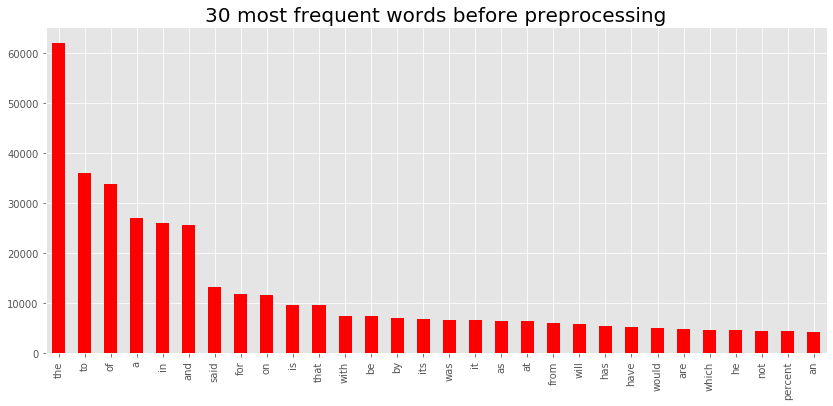

In [60]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(df_trainset["text"]).split()).value_counts()[:30]
freq.plot(kind="bar", color = "red")
plt.title("30 most frequent words before preprocessing",size=20)

Text(0.5, 1.0, '30 most frequent words after preprocessing')

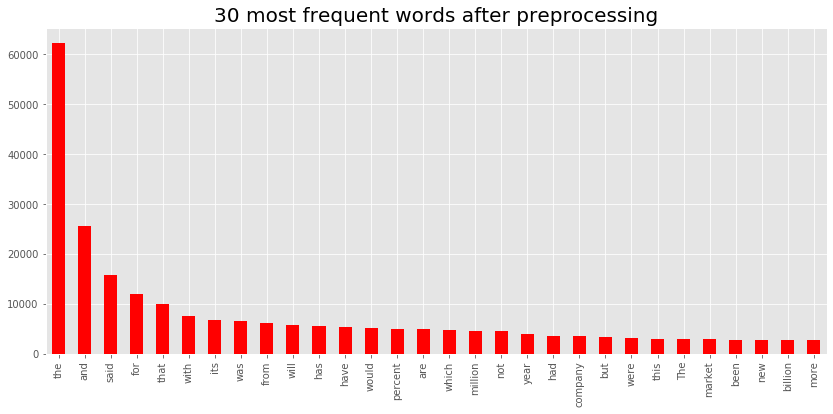

In [61]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(df_trainset["preprocessed_text"]).split()).value_counts()[:30]
freq.plot(kind="bar", color = "red")
plt.title("30 most frequent words after preprocessing",size=20)

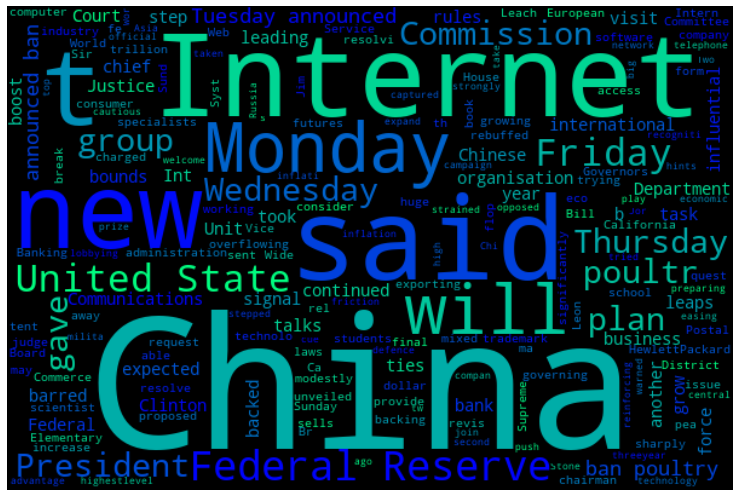

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud=WordCloud(colormap="winter",width=600,height=400).generate(str(df_trainset["preprocessed_text"]))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

In [63]:
df_testset=dataframe_creation('./data/C50test/')

In [64]:
df_testset["preprocessed_text"] = df_testset["text"].apply(lambda x: preprocessData(str(x)))


In [78]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_cnt = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix_cnt = vectorizer_cnt.fit_transform(df_trainset['preprocessed_text'])
test_matrix_cnt = vectorizer_cnt.transform(df_testset['preprocessed_text'])
print(train_matrix_cnt.shape)

(2500, 49502)


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
vectorizer_tf=TfidfVectorizer(norm = 'l2',min_df = 0, use_idf = True, smooth_idf = False, sublinear_tf = True,
                             ngram_range=(2,3), max_features = 15000,token_pattern=r'\b\w+\b')

train_matrix_tf_idf = vectorizer_tf.fit_transform(df_trainset['preprocessed_text'])
test_matrix_tf_idf = vectorizer_tf.transform(df_testset["preprocessed_text"])

print((train_matrix_tf_idf.shape))

(2500, 15000)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0, '$\\chi^2$')

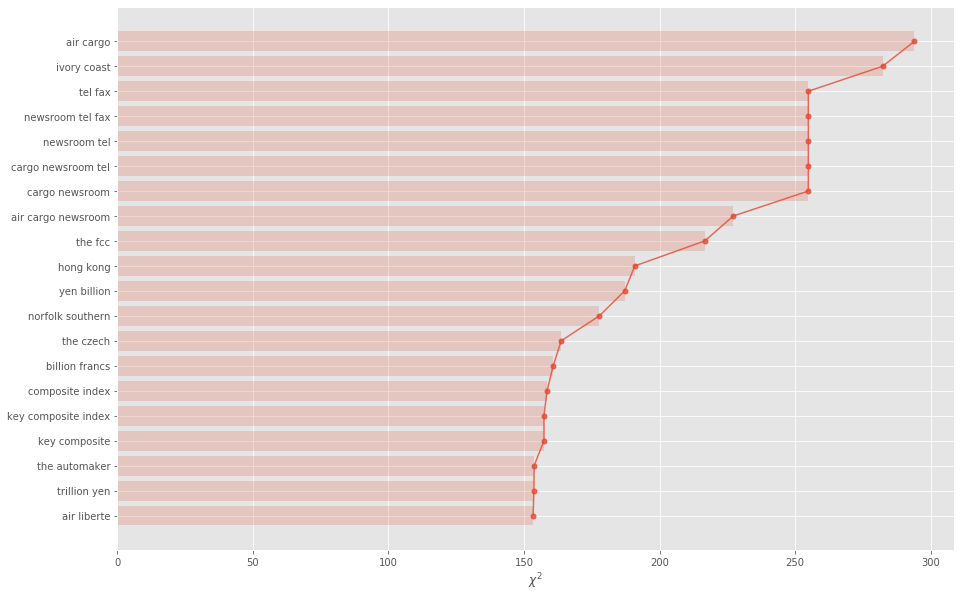

In [66]:
from sklearn.feature_selection import chi2,SelectKBest
from matplotlib import pyplot as plt
chi2score = chi2(train_matrix_tf_idf, df_trainset['author_label'])[0]

plt.figure(figsize=(15,10))
wscores = zip(vectorizer_tf.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

In [67]:


#chi2score = chi2(train_matrix, y_train)[0]
ch2 = SelectKBest(chi2, k=7000)
train_matrix_chi2 = ch2.fit_transform(train_matrix_tf_idf,df_trainset['author_label'])
test_matrix_chi2 = ch2.transform(test_matrix_tf_idf)
print(train_matrix_chi2.shape)

(2500, 7000)


In [80]:
X_train_vectorizors=[train_matrix_cnt,train_matrix_tf_idf,train_matrix_chi2]
X_test_vectorizors=[test_matrix_cnt,test_matrix_tf_idf,test_matrix_chi2]
X_labels=['Count Vectorizer','TF-IDF','TF-IDF + CHI2 ']
y_train = df_trainset['author_label']
y_test = df_testset['author_label']


<h3>KNN Algorithm</h3>

In [84]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
acc_list=[]
prec_list=[]
f1_list=[]
acc_all_model=[]
k=23
cat_names = ['True -ve','False +ve','False -ve','True +ve']

for i in range(3):
    X_train = X_train_vectorizors[i]
    X_test = X_test_vectorizors[i]
    print("----------------------------------------------")
    print("FOR VECTORIZOR "+X_labels[i])

    for m in [#'manhattan',
              'euclidean','cosine']:

        classifier = KNeighborsClassifier(n_neighbors=k,algorithm='auto',metric=m) #Using brute-force algorithm for quicker computation.
        classifier.fit(X_train, y_train) #Fitting the built-in sklearn classifier on our training data
        predicted_label = classifier.predict(X_test) #Making the classifier to predict on the previously unseen test data.

        confusion_mat = confusion_matrix(y_test, predicted_label)
        class_report = classification_report(y_test, predicted_label)
        class_report_dict = classification_report(y_test, predicted_label,output_dict=True)
        acc_list.append({m:np.round(class_report_dict['accuracy']*100,2)})
        f1_list.append({m:np.round(class_report_dict['weighted avg']['f1-score']*100,2)})
        prec_list.append({m:np.round(class_report_dict['weighted avg']['precision']*100,2)})
        if(i==2 and m=='cosine'):
            acc_all_model.append({'knn':np.round(class_report_dict['accuracy']*100,2)})
        print("\nClassification Report for metric = {} is:\n".format(m))
        print(class_report)

----------------------------------------------
FOR VECTORIZOR Count Vectorizer

Classification Report for metric = euclidean is:

              precision    recall  f1-score   support

           0       0.62      0.74      0.67        50
           1       0.15      0.84      0.26        50
           2       0.81      0.50      0.62        50
           3       0.49      0.62      0.55        50
           4       0.64      0.58      0.61        50
           5       0.66      0.46      0.54        50
           6       1.00      0.46      0.63        50
           7       0.78      0.84      0.81        50
           8       0.12      0.78      0.21        50
           9       0.51      0.38      0.44        50
          10       1.00      0.46      0.63        50
          11       0.70      0.64      0.67        50
          12       1.00      0.52      0.68        50
          13       0.28      0.38      0.32        50
          14       0.79      0.44      0.56        50
     


Classification Report for metric = cosine is:

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        50
           1       0.69      0.82      0.75        50
           2       0.60      0.56      0.58        50
           3       0.44      0.78      0.57        50
           4       0.68      0.72      0.70        50
           5       0.72      0.62      0.67        50
           6       0.86      0.84      0.85        50
           7       0.64      0.84      0.72        50
           8       0.76      0.68      0.72        50
           9       0.78      0.64      0.70        50
          10       0.93      1.00      0.96        50
          11       0.71      0.90      0.80        50
          12       0.90      0.94      0.92        50
          13       0.65      0.64      0.65        50
          14       0.53      0.56      0.54        50
          15       0.96      1.00      0.98        50
          16       0.64      0.98

<h5>Comparision of accuracy of knn models for different distance measures and Vectorizors</h5>

In [85]:
df_acc=pd.DataFrame(acc_list)
df_acc = df_acc.apply(lambda x: pd.Series(x.dropna().values))
df_acc.index=X_labels
df_acc.style.highlight_max(color = 'lightblue', axis = 0)

,cosine,euclidean
Count Vectorizer,60.64,51.68
TF-IDF,74.16,74.16
TF-IDF + CHI2,74.8,59.16


<h5>Comparision of precision of knn models for different distance measures and Vectorizors</h5>

In [86]:
df_prec=pd.DataFrame(prec_list)
df_prec = df_prec.apply(lambda x: pd.Series(x.dropna().values))
df_prec.index=X_labels
df_prec.style.highlight_max(color = 'lightblue', axis = 0)

,cosine,euclidean
Count Vectorizer,70.84,69.49
TF-IDF,74.79,74.79
TF-IDF + CHI2,75.25,85.03


<h2>Logistic Regression</h2>

In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_matrix_chi2,y_train)
predictions_lr = lr.predict(test_matrix_chi2)

In [71]:
print(classification_report(predictions_lr,y_test))
class_report_dict_lr = classification_report(y_test, predictions_lr,output_dict=True)
acc_all_model.append({'logistic Regression':np.round(class_report_dict_lr['accuracy']*100,2)})

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        54
           1       0.96      0.94      0.95        51
           2       0.84      0.93      0.88        45
           3       0.92      0.74      0.82        62
           4       0.96      0.92      0.94        52
           5       0.88      0.98      0.93        45
           6       0.96      0.96      0.96        50
           7       0.82      0.93      0.87        44
           8       0.98      0.92      0.95        53
           9       0.92      0.92      0.92        50
          10       1.00      0.98      0.99        51
          11       0.96      0.94      0.95        51
          12       1.00      1.00      1.00        50
          13       0.98      0.89      0.93        55
          14       0.82      0.85      0.84        48
          15       1.00      1.00      1.00        50
          16       0.98      0.86      0.92        57
          17       0.98    

<h2>Naive Bayes</h2>

In [72]:
from sklearn.naive_bayes import MultinomialNB
nby = MultinomialNB()
nby.fit(train_matrix_chi2,y_train)
predictions_nbm=nby.predict(test_matrix_chi2)
print(classification_report(predictions_nbm,y_test))
class_report_dict_nb = classification_report(y_test, predictions_nbm,output_dict=True)
#acc_all_model.append({'Naive Bayes':np.round(class_report_dict_nb['accuracy']*100,2)})

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.96      0.98      0.97        49
           2       0.88      0.96      0.92        46
           3       0.92      0.70      0.79        66
           4       0.96      0.92      0.94        52
           5       0.86      0.98      0.91        44
           6       0.94      0.98      0.96        48
           7       0.96      0.79      0.86        61
           8       0.96      0.94      0.95        51
           9       0.90      1.00      0.95        45
          10       1.00      1.00      1.00        50
          11       0.96      0.91      0.93        53
          12       1.00      1.00      1.00        50
          13       0.94      0.92      0.93        51
          14       0.80      0.83      0.82        48
          15       1.00      1.00      1.00        50
          16       0.98      0.79      0.87        62
          17       0.94    

<h2>Support Vector Machine</h2>

In [73]:
from sklearn import svm
svm = svm.SVC(probability=True, kernel="linear")
svm.fit(train_matrix_chi2,y_train)
prediction_svm = svm.predict(test_matrix_chi2)
print(classification_report(prediction_svm,y_test))
class_report_dict_svm = classification_report(y_test, prediction_svm,output_dict=True)
#acc_all_model.append({'SVM':np.round(class_report_dict_svm['accuracy']*100,2)})

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.96      1.00      0.98        48
           2       0.92      0.90      0.91        51
           3       0.90      0.83      0.87        54
           4       0.98      1.00      0.99        49
           5       0.90      0.94      0.92        48
           6       0.98      0.96      0.97        51
           7       0.84      1.00      0.91        42
           8       1.00      0.85      0.92        59
           9       0.96      0.98      0.97        49
          10       1.00      1.00      1.00        50
          11       0.96      0.96      0.96        50
          12       1.00      1.00      1.00        50
          13       0.96      0.89      0.92        54
          14       0.88      0.94      0.91        47
          15       1.00      1.00      1.00        50
          16       0.94      1.00      0.97        47
          17       1.00    

In [246]:
clf = RandomForestClassifier(min_samples_leaf=4)
clf.fit(train_matrix_chi2,y_train)
prediction_rand = clf.predict(test_matrix_chi2)
print(classification_report(prediction_rand,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        50
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00        50
          10       1.00      1.00      1.00        50
          11       1.00      1.00      1.00        50
          12       1.00      1.00      1.00        50
          13       1.00      1.00      1.00        50
          14       1.00      1.00      1.00        50
          15       1.00      1.00      1.00        50
          16       1.00      1.00      1.00        50
          17       1.00    

In [245]:
print(prediction_bag)

[ 0  0  0 ... 49 49 49]
